### Unzip images

In [1]:
# !unzip dataset.zip

### Import Dataset



In [2]:
import os
import pickle
import numpy as np
import math
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

dataset_dir = "dataset/"

### Import TrainSet

In [3]:
def read_files(folder):
  arr = []
  for file in os.listdir(dataset_dir+folder):
      if file.endswith(".png"):
          arr.append(os.path.join(dataset_dir, folder, file))
  return arr

In [4]:
train_f = read_files('trainset/faces')
train_nf = read_files('trainset/non-faces')
print(train_nf)

['dataset/trainset/non-faces/B20_01741.png', 'dataset/trainset/non-faces/B20_01910.png', 'dataset/trainset/non-faces/B1_00053.png', 'dataset/trainset/non-faces/B20_02446.png', 'dataset/trainset/non-faces/B20_01980.png', 'dataset/trainset/non-faces/B1_00306.png', 'dataset/trainset/non-faces/B1_00392.png', 'dataset/trainset/non-faces/B20_01880.png', 'dataset/trainset/non-faces/B1_00336.png', 'dataset/trainset/non-faces/B5_00163.png', 'dataset/trainset/non-faces/B20_01621.png', 'dataset/trainset/non-faces/B20_01884.png', 'dataset/trainset/non-faces/B1_00094.png', 'dataset/trainset/non-faces/B1_00185.png', 'dataset/trainset/non-faces/B5_00124.png', 'dataset/trainset/non-faces/B5_00050.png', 'dataset/trainset/non-faces/B20_01511.png', 'dataset/trainset/non-faces/B5_00109.png', 'dataset/trainset/non-faces/B5_00240.png', 'dataset/trainset/non-faces/B1_00022.png', 'dataset/trainset/non-faces/B1_00554.png', 'dataset/trainset/non-faces/B20_01877.png', 'dataset/trainset/non-faces/B1_00416.png', '

### Import TestSet

In [5]:
test_f = read_files('testset/faces')
test_nf = read_files('testset/non-faces')
print(test_f)

['dataset/testset/faces/cmu_0378.png', 'dataset/testset/faces/cmu_0375.png', 'dataset/testset/faces/cmu_0338.png', 'dataset/testset/faces/cmu_0346.png', 'dataset/testset/faces/cmu_0397.png', 'dataset/testset/faces/cmu_0412.png', 'dataset/testset/faces/cmu_0249.png', 'dataset/testset/faces/cmu_0005.png', 'dataset/testset/faces/cmu_0341.png', 'dataset/testset/faces/cmu_0400.png', 'dataset/testset/faces/cmu_0325.png', 'dataset/testset/faces/cmu_0356.png', 'dataset/testset/faces/cmu_0043.png', 'dataset/testset/faces/cmu_0121.png', 'dataset/testset/faces/cmu_0203.png', 'dataset/testset/faces/cmu_0071.png', 'dataset/testset/faces/cmu_0359.png', 'dataset/testset/faces/cmu_0174.png', 'dataset/testset/faces/cmu_0469.png', 'dataset/testset/faces/cmu_0463.png', 'dataset/testset/faces/cmu_0167.png', 'dataset/testset/faces/cmu_0090.png', 'dataset/testset/faces/cmu_0117.png', 'dataset/testset/faces/cmu_0441.png', 'dataset/testset/faces/cmu_0365.png', 'dataset/testset/faces/cmu_0347.png', 'dataset/te

In [6]:
Image.open(train_f[0]).size

(19, 19)

### Integral Image

In [7]:
def integral_image(image):
    ii = np.zeros(image.shape)
    s = np.zeros(image.shape)
    new_ii = np.zeros((image.shape[0]+1, image.shape[1]+1))
    
    for i in range(len(image)):
        for j in range(len(image[i])):
            s[i][j] = s[i-1][j] + image[i][j] if i-1 >= 0 else image[i][j]
            ii[i][j] = ii[i][j-1]+s[i][j] if j-1 >= 0 else s[i][j]

    new_ii[1:image.shape[0]+1, 1:image.shape[1]+1] = ii

    return new_ii

In [8]:
sample = np.array(Image.open(train_f[0]))

In [9]:
sample

array([[ 74,  79,  83,  90, 103, 111, 120, 125, 127, 128, 129, 131, 135,
        134, 134, 125, 121, 114, 107],
       [ 76,  75,  75,  78,  83, 101, 101, 113, 122, 126, 127, 120, 116,
         99,  80,  82,  83,  88, 105],
       [ 74,  47,  38,  31,  30,  42,  58,  78, 101, 110, 106,  80,  70,
         46,  38,  35,  44,  50,  81],
       [ 76,  47,  41,  40,  36,  36,  41,  58,  81,  82,  89,  67,  54,
         54,  61,  79,  78,  78,  75],
       [ 97,  68,  48,  49,  48,  45,  44,  51,  79, 108, 113,  85,  60,
         52,  46,  52,  62,  75,  93],
       [ 73,  49,  31,  34,  32,  43,  40,  47,  64, 112, 122,  88,  75,
         56,  43,  53,  60,  76, 105],
       [ 77,  72,  63,  64,  72,  76,  75,  62,  71, 111, 121, 101,  93,
         83,  85,  96, 103, 113, 120],
       [ 83,  89,  93,  83,  82,  88,  81,  69,  79, 110, 123, 110, 114,
        117, 117, 122, 127, 128, 124],
       [ 84,  90,  96, 106, 108, 106,  89,  72,  80, 111, 125, 113, 115,
        130, 135, 135, 132, 131

In [10]:
i_sample = integral_image(sample)
print(i_sample)

[[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.    74.   153.   236.   326.   429.   540.   660.   785.   912.
   1040.  1169.  1300.  1435.  1569.  1703.  1828.  1949.  2063.  2170.]
 [    0.   150.   304.   462.   630.   816.  1028.  1249.  1487.  1736.
   1990.  2246.  2497.  2748.  2981.  3195.  3402.  3606.  3808.  4020.]
 [    0.   224.   425.   621.   820.  1036.  1290.  1569.  1885.  2235.
   2599.  2961.  3292.  3613.  3892.  4144.  4386.  4634.  4886.  5179.]
 [    0.   300.   548.   785.  1024.  1276.  1566.  1886.  2260.  2691.
   3137.  3588.  3986.  4361.  4694.  5007.  5328.  5654.  5984.  6352.]
 [    0.   397.   713.   998.  1286.  1586.  1921.  2285.  2710.  3220.
   3774.  4338.  4821.  5256.  5641.  6000.  6373.  6761.  7166.  7627.]
 [    0.   470.   835.  1151.  1473.  1805.  2183.  2587.  3059.  3633.
   4299.  4985.  5556.  6066.  6507.  6909.  7335.  7783. 

### Number of Harr Features

In [11]:
features = 5;
feature = [[2,1], [1,2], [3,1], [1,3], [2,2]];
frameSize = 19;

total_features = 0;
count = 0
feature_size = [0]*features

for i in range(features):
    sizeX = feature[i][0];
    sizeY = feature[i][1];

    for width in range(sizeX,frameSize+1,sizeX):
        for height in range(sizeY, frameSize+1, sizeY):
            for x in range(frameSize-width+1):
                for y in range(frameSize-height+1):
                    count+=1
                    feature_size[i]+=1

In [12]:
print('The total number of Harr Features is ', count)
print('There are %d type 1 (two vertical) features'% feature_size[0])
print('There are %d type 2 (two horizontal) features'% feature_size[1])
print('There are %d type 3 (three horizontal) features'% feature_size[2])
print('There are %d type 4 (two vertical) features'% feature_size[3])
print('There are %d type 5 (four) features'% feature_size[4])

The total number of Harr Features is  63960
There are 17100 type 1 (two vertical) features
There are 17100 type 2 (two horizontal) features
There are 10830 type 3 (three horizontal) features
There are 10830 type 4 (two vertical) features
There are 8100 type 5 (four) features


### Harr features extraction to list

In [13]:
class Feature_Type:
    def __init__(self, i, j, w, h):
        self.i = i
        self.j = j
        self.w = w
        self.h = h
        
    def __call__(self, ii):
        return np.sum(np.multiply(ii[self.points_y, self.points_x], self.kernel))

In [14]:
class Vertical_Two(Feature_Type):
    def __init__(self, i, j, w, h):
        super().__init__(i, j, w, h)
        hh = h // 2
        self.points_x = [i, i+w, i, i+w, 
                         i, i+w, i, i+w]
        self.points_y = [j, j, j + hh, j + hh,
                         j+hh, j+hh, j + h, j + h]
        self.kernel = [1, -1, -1, 1, 
                       -1, 1, 1, -1]

In [15]:
class Horizontal_Two(Feature_Type):
    def __init__(self, i, j, w, h):
        super().__init__(i, j, w, h)
        hw = w // 2
        self.points_x = [i, i+hw, i, i+hw, 
                         i+hw, i+w, i + hw, i+w]
        self.points_y = [j, j, j + h, j + h,
                         j, j, j + h, j + h]
        self.kernel = [-1, 1, 1, -1, 
                       1, -1, -1, 1]

In [16]:
class Horizontal_Three(Feature_Type):
    def __init__(self, i, j, w, h):
        super().__init__(i, j, w, h)
        tw = w // 3
        self.points_x = [i, i+tw, i, i+tw, 
                         i+tw, i+2*tw, i+tw, i+2*tw,
                         i+2*tw, i+w, i+2*tw, i+w]
        self.points_y = [j, j, j + h, j + h,
                         j, j, j + h, j + h,
                         j, j, j + h, j + h]
        self.kernel = [-1, 1, 1, -1, 
                       1, -1, -1, 1,
                       -1, 1, 1, -1]

In [17]:
class Vertical_Three(Feature_Type):
    def __init__(self, i, j, w, h):
        super().__init__(i, j, w, h)
        th = h // 3
        self.points_x = [i, i+w, i, i+w,
                         i, i+w, i, i+w,
                         i, i+w, i, i+w]
        self.points_y = [j, j, j+th, j+th,
                         j+th, j+th, j+2*th, j+2*th,
                         j+2*th, j+2*th, j+h, j+h]
        self.kernel = [-1, 1, 1, -1, 
                       1, -1, -1, 1,
                       -1, 1, 1, -1]

In [18]:
class Four(Feature_Type):
    def __init__(self, i, j, w, h):
        super().__init__(i, j, w, h)
        
        hw = w // 2
        hh = h // 2
        
        self.points_x = [i, i+hw, i, i+hw,
                         i+hw, i+w, i+hw, i+w,
                         i, i+hw, i, i+hw,
                         i+hw, i+w, i+hw, i+w]
        self.points_y = [j, j, j+hh, j+hh,
                         j, j, j+hh, j+hh,
                         j+hh, j+hh, j+h, j+h,
                         j+hh, j+hh, j+h, j+h]
        self.kernel = [-1, 1, 1, -1, 
                       1, -1, -1, 1,
                       1, -1, -1, 1,
                       -1, 1, 1, -11]

In [19]:
def position_range(size, window_size = 19):
    return range(0, window_size - size + 1)

def enumerate_positions(shape, window_size = 19):
    return ((i, j)
            for j in position_range(shape[1], window_size) 
            for i in position_range(shape[0], window_size))

def enumerate_shapes(shape, window_size = 19):
    return ((h, w)
            for w in range(shape[1], window_size + 1, shape[1])
            for h in range(shape[0], window_size + 1, shape[0]))

In [20]:
two_horizontal = []
for shape in enumerate_shapes((1, 2), 19):
    for pos in enumerate_positions(shape, 19):
        two_horizontal.append(Horizontal_Two(pos[1], pos[0], shape[1], shape[0]))

two_vertical = []
for shape in enumerate_shapes((2, 1), 19):
    for pos in enumerate_positions(shape, 19):
        two_vertical.append(Vertical_Two(pos[1], pos[0], shape[1], shape[0]))

three_horizontal = []
for shape in enumerate_shapes((1, 3), 19):
    for pos in enumerate_positions(shape, 19):
        three_horizontal.append(Horizontal_Three(pos[1], pos[0], shape[1], shape[0]))

three_vertical = []
for shape in enumerate_shapes((3, 1), 19):
    for pos in enumerate_positions(shape, 19):
        three_vertical.append(Vertical_Three(pos[1], pos[0], shape[1], shape[0]))

four = []
for shape in enumerate_shapes((2, 2), 19):
    for pos in enumerate_positions(shape, 19):
        four.append(Four(pos[1], pos[0], shape[1], shape[0]))

print('Total features: ', len(two_horizontal)+len(two_vertical)+len(three_horizontal)+len(three_vertical)+len(four))

Total features:  63960


In [21]:
# Extract horizontal two feature for sample image
# before extracting for all images

two_horizontal[0](i_sample)

5.0

In [22]:
total_train_cnt = len(train_f)+len(train_nf)
images = np.empty((total_train_cnt,19*19))
labels = np.empty((total_train_cnt))
for i in range(len(train_f)):
    images[i] = np.array(Image.open(train_f[i])).reshape(19*19)
    labels[i] = 1
for i in range(len(train_nf)):
    images[len(train_f)+i] = np.array(Image.open(train_nf[i])).reshape(19*19)
    labels[len(train_f)+i] = 0

In [121]:
total_test_cnt = len(test_f)+len(test_nf)
images_test = np.empty((total_test_cnt, 19*19))
labels_test = np.empty((total_test_cnt))
for i in range(len(test_f)):
    images_test[i] = np.array(Image.open(test_f[i])).reshape(19*19)
    labels_test[i] = 1
for i in range(len(test_nf)):
    images_test[len(test_f)+i] = np.array(Image.open(test_nf[i])).reshape(19*19)
    labels_test[len(test_f)+i] = 0

In [23]:
if not os.path.exists('features_final.pkl'):    
    i = 0
    comp_feature = [0]*63960
    for feature in two_vertical:
        comp_feature[i] = feature
        i+=1
    for feature in two_horizontal:
        comp_feature[i] = feature
        i+=1
    for feature in three_horizontal:
        comp_feature[i] = feature
        i+=1
    for feature in three_vertical:
        comp_feature[i] = feature
        i+=1
    for feature in four:
        comp_feature[i] = feature
        i+=1
    with open('features_final.pkl', 'wb') as f:
      pickle.dump(comp_feature, f)

In [24]:
if not os.path.exists('image_features_final.pkl'):
    image_features = np.zeros((len(images),63960))
    p = 0
    for train_image in images:
        i_image = integral_image(train_image.reshape((19,19)))
        i = 0
        comp_feature = np.zeros((63960))
        for feature in two_vertical:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in two_horizontal:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in three_horizontal:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in three_vertical:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in four:
            comp_feature[i] = feature(i_image)
            i+=1
        image_features[p] = comp_feature
        p+=1
        if p%10==0:
            print('Image %d done' % (p))
    with open('image_features_final.pkl', 'wb') as f:
        pickle.dump(image_features, f)

In [122]:
if not os.path.exists('image_features_test.pkl'):
    image_features_test = np.zeros((len(images_test), 63960))
    p = 0
    for test_image in images_test:
        i_image = integral_image(test_image.reshape((19,19)))
        i = 0
        comp_feature = np.zeros((63960))
        for feature in two_vertical:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in two_horizontal:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in three_horizontal:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in three_vertical:
            comp_feature[i] = feature(i_image)
            i+=1
        for feature in four:
            comp_feature[i] = feature(i_image)
            i+=1
        image_features_test[p] = comp_feature
        p+=1
        if p%10==0:
            print('Image %d done' % (p))
    with open('image_features_test.pkl', 'wb') as f:
        pickle.dump(image_features_test, f)

Image 10 done
Image 20 done
Image 30 done
Image 40 done
Image 50 done
Image 60 done
Image 70 done
Image 80 done
Image 90 done
Image 100 done
Image 110 done
Image 120 done
Image 130 done
Image 140 done
Image 150 done
Image 160 done
Image 170 done
Image 180 done
Image 190 done
Image 200 done
Image 210 done
Image 220 done
Image 230 done
Image 240 done
Image 250 done
Image 260 done
Image 270 done
Image 280 done
Image 290 done
Image 300 done
Image 310 done
Image 320 done
Image 330 done
Image 340 done
Image 350 done
Image 360 done
Image 370 done
Image 380 done
Image 390 done
Image 400 done
Image 410 done
Image 420 done
Image 430 done
Image 440 done
Image 450 done
Image 460 done
Image 470 done
Image 480 done
Image 490 done
Image 500 done
Image 510 done
Image 520 done
Image 530 done
Image 540 done
Image 550 done
Image 560 done
Image 570 done
Image 580 done
Image 590 done
Image 600 done
Image 610 done
Image 620 done
Image 630 done
Image 640 done
Image 650 done
Image 660 done
Image 670 done
Imag

### Train 

In [25]:
image_features = pickle.load(open('image_features_final.pkl', 'rb'))
features = pickle.load(open('features_final.pkl', 'rb'))
print(image_features[0][:10])

[ -2.   2.  -2. -21.  24.  -4.  -6.  -1.   0.   0.]


In [96]:
class WeakClassifier:
    def __init__(self, feature_index, threshold, polarity):
        self.threshold = threshold
        self.polarity = polarity
        self.feature_index = feature_index

    def classify(self, x):
        if self.polarity == None:
            self.polarity = 0
        if type(x) is np.ndarray or x == None:
            x = 0
        if self.threshold == None:
            self.threshold = 0
        return 1 if self.polarity * x < self.polarity * self.threshold else 0

In [27]:
def train_weak(X, labels, features, weights):
    tp, tn = 0, 0
    for w, label in zip(weights, labels):
        if label == 1:
            tp += w
        else:
            tn += w
    classifiers = []
    total_features = X.shape[0]
    for i, feature in enumerate(X):
        if len(classifiers) % 1000 == 0 and len(classifiers) != 0:
            print("Trained %d classifiers out of %d" % (len(classifiers), total_features))
        
        image_feature = sorted(zip(weights, feature, labels), key=lambda x: x[1])
        pseen, nseen = 0, 0
        pweights, nweights = 0, 0
        min_error, b_feature, b_threshold, b_polarity = float('inf'), None, None, None
        
        for w, f, label in image_feature:
            error = min(nweights + tp - pweights, pweights + tn - nweights)
            
            if error < min_error:
                min_error = error
                b_feature = i
                b_threshold = f
                if pseen > nseen:
                    b_polarity = 1
                else:
                    b_polarity = -1
            
            if label == 1:
                pseen += 1
                pweights += w
            else:
                nseen += 1
                nweights += w
        
        clf = WeakClassifier(b_feature, b_threshold, b_polarity)
        classifiers.append(clf)
    return classifiers

In [28]:
def best_classifier(classifiers, weights, training_data, labels):
    best_clf, best_error, best_accuracy = None, float('inf'), None
    for clf in classifiers:
        error, accuracy = 0, []
        for i in range(len(training_data)):
            miss = abs(clf.classify(training_data[i][clf.feature_index]) - labels[i])
            # calculating the false positive rate
            accuracy.append(miss)
            error += weights[i] * miss
        error = error / len(training_data)
        if error < best_error:
            best_clf, best_error, best_accuracy = clf, error, accuracy
    return best_clf, best_error, best_accuracy

In [76]:
adaboost_rounds = []

def train(training, labels, rounds, pos_num, neg_num):
    alphas = []
    clfs = []
    weights = np.zeros(len(training))
    
    for x in range(len(training)):
        
        if labels[x] == 1:
            weights[x] = 1.0 / (2 * pos_num)
        else:
            weights[x] = 1.0 / (2 * neg_num)
    
    X, y = np.transpose(training), labels
    
    for t in range(1,rounds+1,1):
        print('Round %d Adaboost\n' % (t))
        weights = weights / np.linalg.norm(weights)
        weak_classifiers = train_weak(X, y, features, weights)
        clf, error, accuracy = best_classifier(weak_classifiers, weights, training, labels)
        if 1.0 - error == 0:
            beta = 1
        else:
            beta = error / (1.0 - error)
        for i in range(len(accuracy)):
            weights[i] = weights[i] * (beta ** (1 - accuracy[i]))
        if beta == 0:
            alpha = 1
        else:
            alpha = math.log(1.0/beta)
        alphas.append(alpha)
        clfs.append(clf)
    return (clfs, alphas)
#         if t in [1,3,5,10]:
#             adaboost_rounds.append(clfs)

In [30]:
# train(image_features, labels, 10, len(train_f), len(train_nf))

In [31]:
if os.path.exists('adaboost_final.pkl'):
    with open('adaboost_final.pkl', 'rb') as f:
        alphas = pickle.load(f)
        clfs = pickle.load(f)
#         adaboost_rounds = pickle.load(f)
else:
    with open('adaboost_final.pkl', 'wb') as f:
        pickle.dump(alphas, f)
        pickle.dump(clfs, f)

In [32]:
def evaluate(clf, data, labels):
    correct = 0
    false_negative = 0
    false_positive = 0
    faces = 0
    non_faces = 0
    for i in range(len(data)):
        if(labels[i]==1):
            faces+=1
        else:
            non_faces+=1
        pred = clf.classify(data[i][clf.feature_index])
        if pred == labels[i]:
            correct += 1  
        else:
            if pred == 1:
                false_positive+=1
            else:
                false_negative+=1

    return (correct, false_positive, false_negative, faces, non_faces)

In [33]:
evaluate(clfs[0], image_features, labels)

(2157, 299, 43, 499, 2000)

### Adaboost Rounds

In [34]:
for i in [1,3,5,10]:
    feature = features[clfs[i-1].feature_index]
    print('Feature number ', i)
    print('Type: ', type(feature).__name__.replace('_', ' '))
    print('Position: (%d, %d)' % (feature.i, feature.j))
    print('Width: ', feature.w)
    print('Length: ', feature.h)
    print('Threshold: ', clfs[i-1].threshold)
    print('Training accuracy: ', round((evaluate(clfs[i-1], image_features, labels)[0])/2499, 2), '\n')

Feature number  1
Type:  Horizontal Two
Position: (8, 3)
Width:  2
Length:  8
Threshold:  112.0
Training accuracy:  0.86 

Feature number  3
Type:  Vertical Three
Position: (11, 3)
Width:  7
Length:  9
Threshold:  -1534.0
Training accuracy:  0.67 

Feature number  5
Type:  Vertical Two
Position: (2, 1)
Width:  2
Length:  2
Threshold:  -68.0
Training accuracy:  0.81 

Feature number  10
Type:  Vertical Two
Position: (10, 14)
Width:  8
Length:  2
Threshold:  -136.0
Training accuracy:  0.2 



In [193]:
sample = np.array(Image.open(test_f[13]))

### Horizontal Two Feature Round 1

In [194]:
feature = features[clfs[0].feature_index]
left = feature.i
top = feature.j
width = feature.w
height = feature.h
adaboost_image = sample.copy()
adaboost_image[top:top+height, left:left+width//2] = 255
adaboost_image[top:top+height, left+width//2:left+width] = 0
img = Image.fromarray(np.uint8(adaboost_image))
img.show()

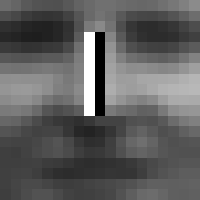

In [195]:
img.resize((200,200))

### Vertical Three Feature Round 3

In [196]:
feature = features[clfs[2].feature_index]
left = feature.i
top = feature.j
width = feature.h
height = feature.w
adaboost_image = sample.copy()
hh = height//3
adaboost_image[top:top+hh, left:left+width] = 255
adaboost_image[top+hh:top+2*hh, left:left+width] = 0
adaboost_image[top+2*hh:top+height, left:left+width] = 255
img = Image.fromarray(np.uint8(adaboost_image))
img.show()

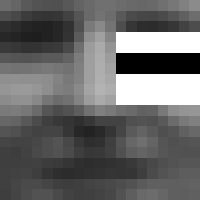

In [197]:
img.resize((200,200))

### Vertical Two Feature Round 5

In [198]:
feature = features[clfs[4].feature_index]
left = feature.i
top = feature.j
width = feature.w
height = feature.h
adaboost_image = sample.copy()
hh = height//2
adaboost_image[top:top+hh, left:left+width] = 0
adaboost_image[top+hh:top+height, left:left+width] = 255
img = Image.fromarray(np.uint8(adaboost_image))
img.show()

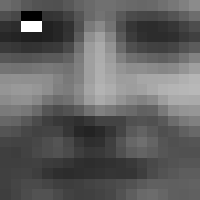

In [199]:
img.resize((200,200))

### Horizontal Two Feature Round 10

In [200]:
feature = features[clfs[9].feature_index]
left = feature.i
top = feature.j
width = feature.w
height = feature.h
adaboost_image = sample.copy()
hh = height//2
adaboost_image[top:top+hh, left:left+width] = 0
adaboost_image[top+hh:top+height, left:left+width] = 255
img = Image.fromarray(np.uint8(adaboost_image))
img.show()

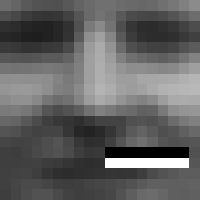

In [201]:
img.resize((200,200))

### Adaboost rounds on train data (Accuracy, False Positive and False Negative)

In [43]:
for i in [1,3,5,10]:
    correct, fp, fn, f, nf = (evaluate(clfs[i-1], image_features, labels))
    print('Adaboost Round %d' % i)
    print('Training accuracy: %.2f (%d/%d)' % (correct/(f+nf), correct, f+nf))
    print('False positive: %.2f (%d/%d)' % (fp/nf, fp, nf))
    print('False negative: %.2f (%d/%d)\n' % (fn/f, fn, f))

Adaboost Round 1
Training accuracy: 0.86 (2157/2499)
False positive: 0.15 (299/2000)
False negative: 0.09 (43/499)

Adaboost Round 3
Training accuracy: 0.67 (1682/2499)
False positive: 0.26 (522/2000)
False negative: 0.59 (295/499)

Adaboost Round 5
Training accuracy: 0.81 (2025/2499)
False positive: 0.03 (58/2000)
False negative: 0.83 (416/499)

Adaboost Round 10
Training accuracy: 0.20 (509/2499)
False positive: 0.96 (1913/2000)
False negative: 0.15 (77/499)



### Adaboost on Test Data

In [123]:
for i in [1,3,5,10]:
    correct, fp, fn, f, nf = (evaluate(clfs[i-1], image_features_test, labels_test))
    print('Adaboost Round %d' % i)
    print('Training accuracy: %.2f (%d/%d)' % (correct/(f+nf), correct, f+nf))
    print('False positive: %.2f (%d/%d)' % (fp/nf, fp, nf))
    print('False negative: %.2f (%d/%d)\n' % (fn/f, fn, f))

Adaboost Round 1
Training accuracy: 0.79 (1950/2473)
False positive: 0.08 (165/2001)
False negative: 0.76 (358/472)

Adaboost Round 3
Training accuracy: 0.51 (1255/2473)
False positive: 0.44 (889/2001)
False negative: 0.70 (329/472)

Adaboost Round 5
Training accuracy: 0.81 (1992/2473)
False positive: 0.01 (16/2001)
False negative: 0.99 (465/472)

Adaboost Round 10
Training accuracy: 0.19 (473/2473)
False positive: 0.99 (1990/2001)
False negative: 0.02 (10/472)



### Evaluating Strong Classifier

In [44]:
def evaluate_strong_classifier(images_data, labels, rounds):
    correct = 0
    false_negative = 0
    false_positive = 0
    faces = 0
    non_faces = 0
    for i in range(len(images_data)):
        if(labels[i]==1):
            faces+=1
        else:
            non_faces+=1
        total = 0
        ii = integral_image(images_data[i].reshape((19,19)))
        for j in range(rounds):
            clf = clfs[j]
            alpha = alphas[j]
            x = features[clf.feature_index](ii)
            total += alpha * x
        if total >= 0.5 * sum(alphas):
            pred = 1
        else:
            pred = 0
        if pred == labels[i]:
            correct += 1
        else:
            if pred == 1:
                false_positive+=1
            else:
                false_negative+=1

    return (correct, false_positive, false_negative, faces, non_faces)

In [45]:
for i in [1,3,5,10]:
    correct, fp, fn, f, nf = evaluate_strong_classifier(images, labels, i)
    print('Round %d Adaboost Strong Classifier' % (i))
    print('Training accuracy: %.2f (%d/%d)' % (correct/(f+nf), correct, f+nf))
    print('False positive: %.2f (%d/%d)' % (fp/(f+nf), fp, (f+nf)))
    print('False negative: %.2f (%d/%d)\n' % (fn/(f+nf), fn, (f+nf)))

Round 1 Adaboost Strong Classifier
Training accuracy: 0.64 (1597/2499)
False positive: 0.36 (889/2499)
False negative: 0.01 (13/2499)

Round 3 Adaboost Strong Classifier
Training accuracy: 0.80 (1987/2499)
False positive: 0.01 (13/2499)
False negative: 0.20 (499/2499)

Round 5 Adaboost Strong Classifier
Training accuracy: 0.79 (1977/2499)
False positive: 0.01 (24/2499)
False negative: 0.20 (498/2499)

Round 10 Adaboost Strong Classifier
Training accuracy: 0.81 (2031/2499)
False positive: 0.05 (124/2499)
False negative: 0.14 (344/2499)



### Evaluate strong classifier on test data

In [253]:
for i in [1,3,5,10]:
    correct, fp, fn, f, nf = evaluate_strong_classifier(images_test, labels_test, i)
    print('Round %d Adaboost Strong Classifier' % (i))
    print('Training accuracy: %.2f (%d/%d)' % (correct/(f+nf), correct, f+nf))
    print('False positive: %.2f (%d/%d)' % (fp/(f+nf), fp, (f+nf)))
    print('False negative: %.2f (%d/%d)\n' % (fn/(f+nf), fn, (f+nf)))

Round 1 Adaboost Strong Classifier
Training accuracy: 0.67 (1669/2473)
False positive: 0.25 (621/2473)
False negative: 0.07 (183/2473)

Round 3 Adaboost Strong Classifier
Training accuracy: 0.81 (1998/2473)
False positive: 0.00 (4/2473)
False negative: 0.19 (471/2473)

Round 5 Adaboost Strong Classifier
Training accuracy: 0.81 (1995/2473)
False positive: 0.00 (7/2473)
False negative: 0.19 (471/2473)

Round 10 Adaboost Strong Classifier
Training accuracy: 0.81 (1994/2473)
False positive: 0.02 (51/2473)
False negative: 0.17 (428/2473)



### Adjusting the threshold (False positive rate)

In [46]:
# train(image_features, labels, 5, len(train_f), len(train_nf))

In [47]:
# if os.path.exists('adaboost_fp.pkl'):
#     with open('adaboost_fp.pkl', 'rb') as f:
#         alphas = pickle.load(f)
#         clfs = pickle.load(f)
# else:
#     with open('adaboost_fp.pkl', 'wb') as f:
#         pickle.dump(alphas, f)
#         pickle.dump(clfs, f)

## Bonus

In [98]:
# clfs, alphas = train(image_features, labels, 40, len(train_f), len(train_nf))

Round 1 Adaboost

Trained 1000 classifiers out of 63960
Trained 2000 classifiers out of 63960
Trained 3000 classifiers out of 63960
Trained 4000 classifiers out of 63960
Trained 5000 classifiers out of 63960
Trained 6000 classifiers out of 63960
Trained 7000 classifiers out of 63960
Trained 8000 classifiers out of 63960
Trained 9000 classifiers out of 63960
Trained 10000 classifiers out of 63960
Trained 11000 classifiers out of 63960
Trained 12000 classifiers out of 63960
Trained 13000 classifiers out of 63960
Trained 14000 classifiers out of 63960
Trained 15000 classifiers out of 63960
Trained 16000 classifiers out of 63960
Trained 17000 classifiers out of 63960
Trained 18000 classifiers out of 63960
Trained 19000 classifiers out of 63960
Trained 20000 classifiers out of 63960
Trained 21000 classifiers out of 63960
Trained 22000 classifiers out of 63960
Trained 23000 classifiers out of 63960
Trained 24000 classifiers out of 63960
Trained 25000 classifiers out of 63960
Trained 26000 cl

In [105]:
if os.path.exists('cascade.pkl'):
    with open('cascade.pkl', 'rb') as f:
        bonus_alphas = pickle.load(f)
        bonus_clfs = pickle.load(f)
else:
    with open('cascade.pkl', 'wb') as f:
        pickle.dump(alphas, f)
        pickle.dump(clfs, f)

In [259]:
# Experimenting
layers = [5, 5, 5, 10]

def cascade_train(data, labels):
    non_faces = []
    for i in range(len(data)): 
        if labels[i] != 1:
            non_faces.append(i)
    prev = len(non_faces)
    skip = 0
    for rounds in layers:
        if len(non_faces) == 0:
            print("Stop cascade early")
            break
        
        false_positives = []
        for ex in non_faces:
            total = 0
            for j in range(skip,skip+rounds):
                clf = clfs[j]
                alpha = alphas[j]
                x = data[ex][clf.feature_index]
                total += alpha * x
            if total >= 0.5 * sum(alphas[skip:skip+rounds]):
                pred = 1
            else:
                pred = 0
            if pred == 1:
                false_positives.append(ex)
        non_faces = false_positives
        print('Layer with %d rounds done' % rounds)
        print('Number of non-faces discarded: ', prev-len(non_faces))
        prev = len(non_faces)
        skip += rounds
    return prev

In [260]:
cascade_train(image_features, labels)

Layer with 5 rounds done
Number of non-faces discarded:  1976
Layer with 5 rounds done
Number of non-faces discarded:  10
Layer with 5 rounds done
Number of non-faces discarded:  9
Layer with 10 rounds done
Number of non-faces discarded:  4


1

In [251]:
def cascade_evaluate(data, labels):
    cur_data = []
    for i in range(len(data)):
        cur_data.append(i)
    correct = 0
    fp = 0
    fn = 0
    skip = 0
    for rounds in layers:
        new_data = []
        for i in cur_data:
            total = 0
            for j in range(skip, skip+rounds):
                clf = clfs[j]
                alpha = alphas[j]
                x = data[i][clf.feature_index]
                total += alpha * x
            if total >= 0.5 * sum(alphas[skip:skip+rounds]):
                pred = 1
            else:
                pred = 0
            if pred == 1:
                new_data.append(i)
            else:
                if labels[i]==1:
                    fn+=1
                else:
                    correct+=1
        cur_data = new_data
        print('Layer with %d rounds done' % rounds)
        skip += rounds
    fp = len(cur_data)
    return (correct, fp, fn)

In [252]:
correct, fp, fn = cascade_evaluate(image_features, labels)
f = len(train_f)
nf = len(train_nf)
print('Cascade Classifier on Train')
print('Training accuracy: %.2f (%d/%d)' % (correct/(f+nf), correct, f+nf))
print('False positive: %.2f (%d/%d)' % (fp/(f+nf), fp, (f+nf)))
print('False negative: %.2f (%d/%d)\n' % (fn/(f+nf), fn, (f+nf)))

Layer with 5 rounds done
Layer with 5 rounds done
Layer with 5 rounds done
Layer with 10 rounds done
Cascade Classifier on Train
Training accuracy: 0.80 (1999/2499)
False positive: 0.00 (1/2499)
False negative: 0.20 (499/2499)



### Cascade on test data

In [245]:
correct, fp, fn = cascade_evaluate(image_features_test, labels_test)
f = len(test_f)
nf = len(test_nf)
print('Cascade Classifier on Test')
print('Training accuracy: %.2f (%d/%d)' % (correct/(f+nf), correct, f+nf))
print('False positive: %.2f (%d/%d)' % (fp/(f+nf), fp, (f+nf)))
print('False negative: %.2f (%d/%d)\n' % (fn/(f+nf), fn, (f+nf)))

Layer with 1 rounds done
Layer with 5 rounds done
Layer with 10 rounds done
Layer with 5 rounds done
Cascade Classifier on Test
Training accuracy: 0.81 (2000/2473)
False positive: 0.00 (1/2473)
False negative: 0.19 (472/2473)

